# 1.逻辑回归(Logistic Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入数据
data = pd.read_csv('ex2data1.txt',header=None,names=['Exam1','Exam2','Admitted'])

In [3]:
#查看数据
data.head(5)

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


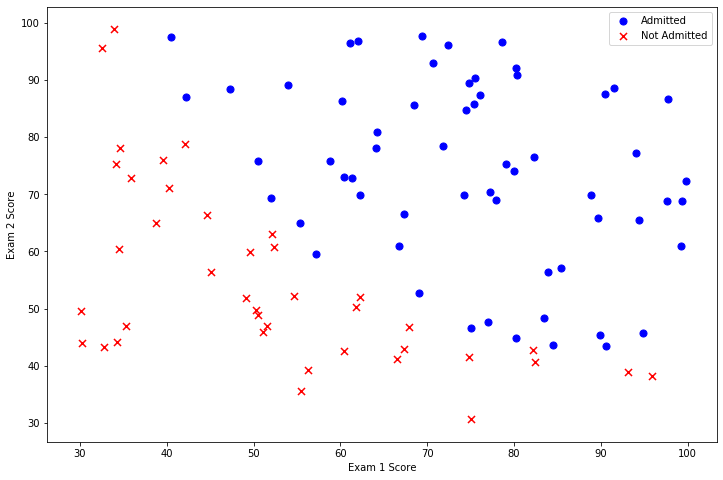

In [4]:
#用图像查看数据
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'],positive['Exam2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam1'],negative['Exam2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [5]:
#定义激活函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

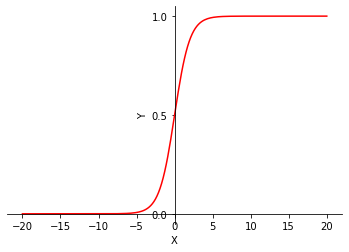

In [6]:
#查看激活函数图像
x = np.linspace(-20,20,200)
y = sigmoid(x)
plt.xlabel('X')
plt.ylabel('Y')
plt.yticks([0,0.5,1])
plt.plot(x,y,'r')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
plt.show()

In [7]:
#代价函数
def cost(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/(len(X))

In [8]:
#数据处理过程
#在数据集的第一列前插入全为1的矩阵
data.insert(0,'One',1)

#设置X训练集和y
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [9]:
#将X,y转化为矩阵，并初始化theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [10]:
#检查数据格式
X.shape,theta.shape,y.shape

((100, 3), (3,), (100, 1))

In [11]:
#计算初始化参数的代价函数
cost(theta,X,y)

0.6931471805599453

In [12]:
#批量梯度下降(batch gardient descent)
#此函数仅仅计算了一个步长，没有通过迭代来求得最优theta值
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T)-y
    
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term)/len(X)
        
    return grad

In [13]:
#查看初始参数为0的梯度下降法的结果
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [14]:
#SciPy的optimize模块提供了许多数值优化算法
'''
scipy中的optimize子包中提供了常用的最优化算法函数实现，我们可以直接调用这些函数完成我们的优化问题。

scipy.optimize包提供了几种常用的优化算法。 该模块包含以下几个方面 

    1.使用各种算法(例如BFGS，Nelder-Mead单纯形，牛顿共轭梯度，COBYLA或SLSQP)的无约束和约束最小化多元标量函数(minimize())
    2.全局(蛮力)优化程序(例如，anneal()，basinhopping())
    3.最小二乘最小化(leastsq())和曲线拟合(curve_fit())算法
    4.标量单变量函数最小化(minim_scalar())和根查找(newton())
    5.使用多种算法(例如，Powell，Levenberg-Marquardt混合或Newton-Krylov等大规模方法)的多元方程系统求解

在用python实现逻辑回归和线性回归时，使用梯度下降法最小化cost function，用到了fmin_tnc()和minimize()。

fmin_tnc()
有约束的多元函数问题，提供梯度信息，使用截断牛顿法

最常使用的参数：
func：优化的目标函数
x0：初值
fprime：提供优化函数func的梯度函数，不然优化函数func必须返回函数值和梯度，或者设置approx_grad=True
approx_grad :如果设置为True，会给出近似梯度
args：元组，是传递给优化函数的参数

'''

#使用用 SciPy 中的 truncated newton（TNC）实现寻找最优参数
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))
result 

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [15]:
#查看最优参数下的损耗
cost(result[0],X,y)

0.20349770158947458

In [16]:
#利用最优参数编写预测函数
def predict(theta,X):
    probability = sigmoid(X*theta.T)
    return[1 if x >= 0.5 else 0 for x in probability]

In [17]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
correct = [1 if((a==1 and b==1)or(a==0 and b==0))else 0 for(a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct))%len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


# 2.正则化逻辑回归

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

#导入数据
data2 = pd.read_csv('ex2data2.txt',header = None,names = ['Test1','Test2','Accepted'])
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


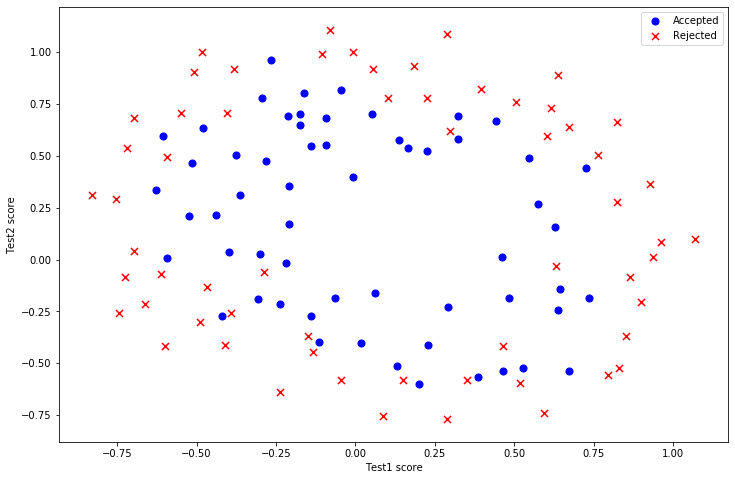

In [19]:
#分割图像并在图像中查看数据分布
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],s=50,c='b',marker='o',label='Accepted')
ax.scatter(negative['Test1'],negative['Test2'],s=50,c='r',marker='x',label='Rejected')
ax.legend()
ax.set_xlabel('Test1 score')
ax.set_ylabel('Test2 score')
plt.show()

In [20]:
#自己创建一组多项式特征
degree = 5
x1 = data2['Test1']
x2 = data2['Test2']
s1 = ''

#x1^1*x2^0+x1^2*x2^0+x1^1*x2^1+x1^3*x2^0+x1^2*x2^1+x1^1*x2^2+x1^4*x2^0+x1^3*x2^1+x1^2*x2^2+x1^1*x2^3
data2.insert(3,'Ones',1)

for i in range(1,degree):
    for j in range(0,i):
        data2['F'+str(i)+str(j)] = np.power(x1,i-j)*np.power(x2,j)
        
data2.drop('Test1',axis=1,inplace=True)
data2.drop('Test2',axis=1,inplace=True)
        
data2.head(5)

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [24]:
#正则花代价函数（regularized cost）
#lambda(lamda) 控制theta参数
def costReg(theta,X,y,lamda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    reg = (lamda /(2*len(X)))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return np.sum(first-second)/len(X)+reg

In [33]:
#定义梯度下降函数
def gradientReg(theta,X,y,lamda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T)-y
    
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        if(i==0):
            grad[i] = np.sum(term)/len(X)
        else:
            grad[i] = (np.sum(term)/len(X))+((lamda/len(X))*theta[:,i])
            
    return grad
        

In [34]:
#初始化变量
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

lamda = 1

In [35]:
costReg(theta2,X2,y2,lamda)

0.6931471805599454

In [36]:
gradientReg(theta2,X2,y2,lamda)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [37]:
import scipy.optimize as opt
result2 = opt.fmin_tnc(func=costReg,x0=theta2,fprime=gradientReg,args=(X2,y2,lamda))
result2

(array([ 0.53010249,  0.29075567, -1.60725763, -0.5821382 ,  0.01781027,
        -0.21329509, -0.40024142, -1.37144138,  0.02264303, -0.9503358 ,
         0.0344085 ]), 22, 1)

In [49]:
#查看预测函数的准确性
theta_min = np.matrix(result2[0])
predictions = predict(theta_min,X2)
correct = [1 if((a==1 and b==1)or(a==0 and b==0))else 0 for(a,b) in zip(predictions,y2)]
accuracy = (sum(map(int,correct))%len(correct))
print('accuracy={0}%'.format(accuracy))

accuracy=78%


In [52]:
#可以使用高级Python库像scikit-learn来解决这个问题
from sklearn import linear_model #调用sklearn线性回归包
model = linear_model.LogisticRegression(penalty='l2',C=1.0,solver='liblinear')
model.fit(X2,y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
model.score(X2,y2)

0.6610169491525424